L'objectif du TP est d'implémenter les mesures vues en cours: moyenne, médiane, quartiles, corrélations. Le dataset concerné est un jeu de donnée qui contient le prix des 3 qualités de médicaments dans différents états d'amériques. La référence du dataset est disponible ici : https://github.com/amitkaps/weed/blob/master/1-Acquire.ipynb

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

Les données sont composées de trois fichiers:
* Le prix par date et par état (pour trois qualités différentes)
* Des informations démographiques sur chaque état
* La population de chaque état


In [2]:
PATH = ('/Users/Lingshu/Desktop/3I026/tp_1/data/')
prices_pd = pd.read_csv(f"{PATH}Weed_Price.csv", parse_dates=[-1])
demography_pd = pd.read_csv(f"{PATH}Demographics_State.csv")
population_pd = pd.read_csv(f"{PATH}Population_State.csv")

## Exercice: 
* Commencez par visualiser la structure des données chargées (méthode ''head()'' et ''tail()'')

In [3]:
prices_pd.head() #print first 5 rows

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [4]:
prices_pd.tail() #print last 5 rows

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
22894,Virginia,364.98,3513,293.12,3079,NaN,284,2014-12-31
22895,Washington,233.05,3337,189.92,3562,NaN,160,2014-12-31
22896,West Virginia,359.35,551,224.03,545,NaN,60,2014-12-31
22897,Wisconsin,350.52,2244,272.71,2221,NaN,167,2014-12-31
22898,Wyoming,322.27,131,351.86,197,NaN,12,2014-12-31


In [5]:
demography_pd.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


In [6]:
population_pd.head() 

,region,value
0,alabama,4777326
1,alaska,711139
2,arizona,6410979
3,arkansas,2916372
4,california,37325068


Les types des données peuvent être récupérer à travers la méthode ''dtypes''

In [7]:
prices_pd.dtypes 

State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

Nous allons maintenant écrire les fonctions permettant de calculer des mesures ''basiques'' sur des données unidimensionnelles. Pour cela, nous allons travailler avec la structure ''array'' de numpy. Pour convertir une colonne ''pandas'' en ''array'', voici commment faire:

In [8]:
prices_pd["MedQ"].values 

array([ 198.64,  260.6 ,  209.35, ...,  224.03,  272.71,  351.86])

## La moyenne

### Exercice: 
Ecrire la fonction moyenne(valeurs) qui calcule la moyenne des éléments d'un tableau (en utilisant la boucle ''for'', sans utiliser les fonctions déjà implémentées dans numpy)

In [9]:
def moyenne_for(target, prices):
    list_MedQ = prices[target].values
    result = 0
    for i in range(len(list_MedQ)):
        result += list_MedQ[i]
    return result/len(list_MedQ)

print('La moyenne (qualité moyenne) est : %f dollars' % moyenne_for("MedQ", prices_pd))

La moyenne (qualité moyenne) est : 247.618306 dollars


Tester la fonction moyenne et comparer vos résultats avec l'implémentation de base de python

In [10]:
def moyenne_fon(target, prices):
    return prices[target].mean()

print("La moyenne (qualité moyenne) est : %f dollars" % moyenne_fon('MedQ', prices_pd))

La moyenne (qualité moyenne) est : 247.618306 dollars


### Exercice:
Calculez:
* La moyenne des prix pour les qualités medium et high
* La moyenne des prix pour les qualités medium et high dans l'état de ''New York''

Les calculs seront fait d'une part à l'aide de votre fonction, et d'autre part à l'aide des fonctions de python. 

In [11]:
print("La moyenne (qualité moyenne) est : %f dollars" % moyenne_for('MedQ', prices_pd))
print("La moyenne de prix (qualité high) est : %f dollars" % moyenne_fon('HighQ', prices_pd))

data_NY = prices_pd.groupby(['State']).get_group('New York')
print("La moyenne de prix (qualité medium) dans New York est : %f dollars" % moyenne_for('MedQ', data_NY))
print("La moyenne de prix (qualité high) dans New York est : %f dollars" % moyenne_fon('HighQ', data_NY))


La moyenne (qualité moyenne) est : 247.618306 dollars
La moyenne de prix (qualité high) est : 329.759854 dollars
La moyenne de prix (qualité medium) dans New York est : 265.376949 dollars
La moyenne de prix (qualité high) dans New York est : 346.912762 dollars


### Exercice
Calculez la moyenne des prix qualités medium et high dans tous les états -- la liste des états est obtenues ainsi states=np.unique(prices_pd["State"].values)

Pour cela, vous pouvez (devez) le faire de deux manières:
* Faites une boucle sur chacun des états
* Utilisez la fonction groupby comme expliqué ici : http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [12]:
states = np.unique(prices_pd["State"].values)

result_MedQ = []
result_HighQ = []

for i in range(len(states)):
    data_AllStates = prices_pd.groupby(['State']).get_group(states[i])   
    result_MedQ.append(moyenne_fon('MedQ', data_AllStates))
    result_HighQ.append(moyenne_fon('HighQ', data_AllStates))
    
print("La moyenne de prix (qualité medium) dans all states est : %f dollars" % (sum(result_MedQ)/len(result_MedQ)))
print("La moyenne de prix (qualité high) dans all states est : %f dollars" % (sum(result_HighQ)/len(result_HighQ)))


La moyenne de prix (qualité medium) dans all states est : 247.618306 dollars
La moyenne de prix (qualité high) dans all states est : 329.759854 dollars


### Exercice
Calculez la moyenne (avec les deux fonctions) sur le prix de la basse qualité. Que constatez vous ? Expliquez...

In [13]:
# Première fonction en utilisant la boucle 'for'
print('La moyenne(qualité moyenne) est : %f' % moyenne_for('LowQ', prices_pd))

#Seconde fonction en utilisant la méthode mean()
print('La moyenne (qualité moyenne) est : %f' % moyenne_fon('LowQ', prices_pd))

# Première fonction avoir un result "nan dollars" (Nan means not a number) c'est-à-dire une donnée perdue 
# Les données perdues sont normals dans une data Frame. 
# Pandas a fourni quelques méthodes pouvoir filtrer les données perdues automatiquement.
# Par exemple, la méthode meane(), il peut donner la moyenne avec filtrer les données perdues automatiquement.


La moyenne(qualité moyenne) est : nan
La moyenne (qualité moyenne) est : 203.747847


### Exercice: 
Remplacez le NAN de la colonne LowQ à l'aide de la fonction décrite ici: http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html. Nous souhaitons plus particulièrement utiliser la méthode ''fill'' après avoir trié par état et par date : prices_pd.sort(columns=['State', 'date'], inplace=True). Expliquez ce que cela fait exactement

In [14]:
prices_pd.fillna(0, inplace = True)

# La méthode fillna() pouvoir remplacer les données NA/NAN et retourner le résultat après les remplacer 
# "inplace = True" c'est-à-dire changer les données dans la dataFrame original

### Exercice: 
Recalculez la moyenne des prix pour la qualité 'Low'. Qu'en est-il maintenant ? 

In [15]:
# Première fonction en utilisant la boucle 'for'
print('La moyenne(qualité moyenne) est : %f' % moyenne_for('LowQ', prices_pd))

#Seconde fonction en utilisant la méthode mean()
print('La moyenne (qualité moyenne) est : %f' % moyenne_fon('LowQ', prices_pd))

#Cela marché tous les deux, mais la moyenne est diminué

La moyenne(qualité moyenne) est : 109.815098
La moyenne (qualité moyenne) est : 109.815098


### Exercice :
Dessinez l'histogramme des moyennes des prix (LowQ) par etat. Pour cela, inspirez vous de http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html

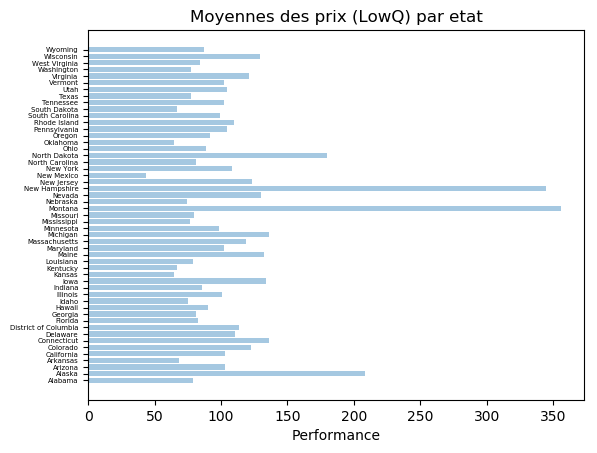

In [16]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib.pyplot as plt

y_pos = np.arange(len(states))

result_LowQ = []
for i in range(len(states)):
    data_AllStates = prices_pd.groupby(['State']).get_group(states[i])   
    result_LowQ.append(moyenne_fon('LowQ', data_AllStates))
#print(y_pos)
#print(result_LowQ)
    
plt.barh(y_pos, result_LowQ, align='center', alpha=0.4)

# ticks
plt.yticks(y_pos, states, fontsize = 5) 

# labels read top-to-bottom             
#plt.invert_yaxis()  
plt.xlabel('Performance')

# Title              
plt.title('Moyennes des prix (LowQ) par etat')

plt.show()



## Estimation de densité

Nous allons maintenant nous intéresser à calculer le nombre d'états concernés par une fourchette de prix. Pour cela:
* Calculer le tableau des prix moyens de la facon suivante
    


In [17]:
prix_moyens=prices_pd[["State","LowQ"]].groupby(["State"]).mean()
#print(prix_moyens)
#print("===========")
prix_moyens=prix_moyens.values.ravel()
#print(prix_moyens)

### Exercice : 
* Calculez les valeurs min et max des prix moyens

In [18]:
print (prix_moyens.min())
print (prix_moyens.max())

43.5982405345
355.643563474


### Exercice : 
Prenez un intervalle de discrétisation de taille 20, et calculez l'effectif (sous forme d'un vecteur) du nombre d'états par ''bins''. Dessinez l'histogramme correspondant

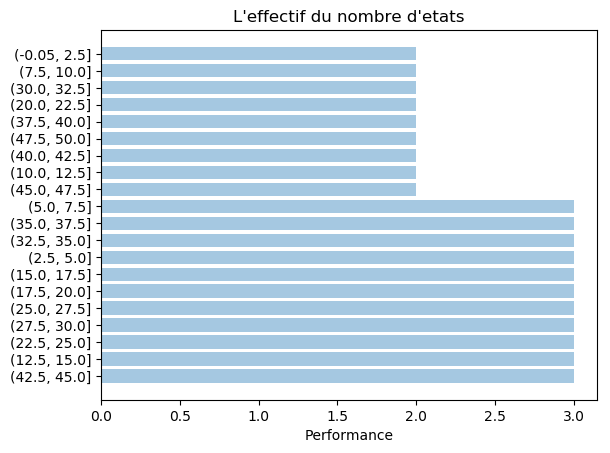

In [19]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cats = pd.Series(pd.cut(demography_pd['region'].index, 20))
cats_intervalle = set(pd.Series(pd.cut(demography_pd['region'].index, 20)))
#print(cats_intervalle)
y_pos = np.arange(len(cats_intervalle))
#print(y_pos)

#print(pd.value_counts(cats))
count_value = np.ndarray.tolist(pd.value_counts(cats).values)
#print(count_value)

plt.barh(y_pos, count_value, align='center', alpha=0.4)

# ticks
plt.yticks(y_pos, cats_intervalle) 

# label
plt.xlabel('Performance')

# Title              
plt.title('L\'effectif du nombre d\'etats')

plt.show()

### Exercice :
Prenez maintenant un intervalle de taille 40

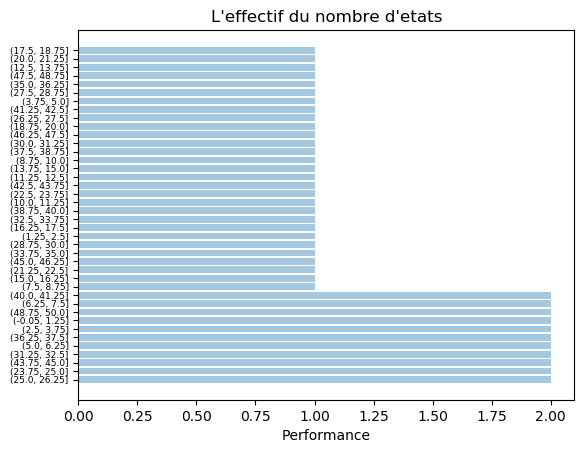

In [20]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cats = pd.Series(pd.cut(demography_pd['region'].index, 40))
cats_intervalle = set(pd.Series(pd.cut(demography_pd['region'].index, 40)))
#print(cats_intervalle)
y_pos = np.arange(len(cats_intervalle))
#print(y_pos)

#print(pd.value_counts(cats))
count_value = np.ndarray.tolist(pd.value_counts(cats).values)
#print(count_value)

plt.barh(y_pos, count_value, align='center', alpha=0.4)

# ticks
plt.yticks(y_pos, cats_intervalle, fontsize = 6.5) 

# label
plt.xlabel('Performance')

# Title              
plt.title('L\'effectif du nombre d\'etats')

plt.show()

On peut faire cela de la manière suivante avec pandas

In [21]:
effectif = pd.cut(prix_moyens,20)
effectif2 = pd.value_counts(effectif)
effectif3 = effectif2.reindex(effectif.categories)
effectif3.plot(kind = 'bar')

Et comme cela avec numpy

In [22]:
plt.hist(prix_moyens,bins=20)

(array([  1.,   6.,  15.,  11.,   6.,   8.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([  43.59824053,   59.20050668,   74.80277283,   90.40503898,
         106.00730512,  121.60957127,  137.21183742,  152.81410356,
         168.41636971,  184.01863586,  199.620902  ,  215.22316815,
         230.8254343 ,  246.42770045,  262.02996659,  277.63223274,
         293.23449889,  308.83676503,  324.43903118,  340.04129733,
         355.64356347]),
 <a list of 20 Patch objects>)

L'estimation de densité en pandas peut se faire ainsi

In [23]:
effectif=pd.DataFrame(prix_moyens)
effectif.plot(kind='kde')

## Densité cumulée

### Exercice: 
Calculez la densité cumulée à partir de prix_moyens, avec un intervalle de discrétisation donné et dessinez. La méthode doit retourner deux tableau: l'abscisse X (les prix moyens possibles entre prix min et prix max), et la densité associée

### Exercice : 
Ecrire la fonction Q(alpha,x,y) qui permet de trouver le quartile(alpha,x,y) - quartile(0.5,x,densite) correspondra à la médiane. Calculez et dessinez (sur une feuille) le boxplot

In [24]:
def Q(alpha, x, y):
    d = df.quartile(alpha, x, y)- quartile(0.5, x, desite)
    return d

#plt.boxplot(Q(alpha, x, y), sym='r*',vert=False,patch_artist=True,meanline=False,showmeans=True)
#plt.show()

Le boxplot en pandas se fait ainsi:

In [25]:
a=pd.DataFrame(prix_moyens)
a.boxplot()

## Variance

### Exercice : 
On souhaite maintenant rajouter une colonne ''HighQ_var'' aux données originales contenant la variance des prix par état. ATTENTION, cela suppose de traiter les états (State) les uns après les autres

In [26]:
prices_pd.insert(0, 'HighQ_var', 0)
prices_pd.head()

,HighQ_var,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,0,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,0,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,0,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,0,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


## Synthèse : La californie

### Exercice : 
Pandas permet de faire la synthèse de données de la manière suivante: 
data.describe()
* Vérifier que les valeurs trouvée sur l'état de la californie collent avec les valeurs trouvées par vos différentes méthodes. 
** Pour cela: mettez le code qui utilise vos fonctions (moyennes, variance, et quartiles) ainsi que le résutlats de la fonction describe

In [27]:
prices_pd.groupby(['State']).get_group['california'].describe()

TypeError: 'method' object is not subscriptable

## Matrice de corrélation

### Exercice: 

Nous allons maintenant nous intéresser à calculer la corrélation entre les prix à new-york et les prix en californie
* Commencez par dessinez le nuage des points des prix(par date) en californie (axe x) et à new york (axe y) pour la bonne qualité. Pour cela on va d'abord créer un DataFrame avec le prix de californie et de new york par date

In [ ]:
prix_ny=prices_pd[prices_pd['State']=='New York']
prix_ca=prices_pd[prices_pd['State']=='California']
prix_ca_ny=prix_ca.merge(prix_ny,on='date')

prix_ca_ny.head()


### Exercice

Dessinez le nuage de points : voir http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 50
#print(prix_ca_ny['HighQ_y'].values)
x1 = prix_ca_ny['HighQ_y'].values
x2 = prix_ca_ny['HighQ_x'].values
y = prix_ca_ny['date'].values
colors = np.random.rand(N)
area = np.pi * (np.random.rand(N)/10)  # 0 to 15 point radii

plt.scatter(x1, y, s=area, color='r', alpha=0.5)
plt.scatter(x2, y, s=area, color='b', alpha=0.5)

plt.legend(labels = ['New York', 'California'], loc = 'best')

plt.xlabel('Les prix pour la bonne qualité')
plt.ylabel('Date')

plt.show()

### Exercice

A l'aide de la fonction moyenne écrite précédemment, écrire une fonction correlation(x,y) qui calcule la correlation lineaire entre deux tableaux numpy

In [ ]:
from numpy import array, cov, corrcoef

def std_fon(prices, target):
    return prices[target].std()

#print("La Déviation standard est : %f " % std_fon(prix_ca_ny, 'HighQ_x'))
    
def correlation(x, y): 
    r = 0
    for i in range(len(x)):
        a = (x[i]-moyenne_fon('HighQ_x', prix_ca_ny))/std_fon(prix_ca_ny, 'HighQ_x')
        b = (y[i]-moyenne_fon('HighQ_y', prix_ca_ny))/std_fon(prix_ca_ny, 'HighQ_y')
        r += (a * b)
    r = r/len(x)
    
    if -1<r<0:
        print('une corrélation négative')
    elif 1>r>0:
        print('Une corrélation positive')
    elif (r==1) or (r==-1):
        print('une corrélation négative')
    elif r == 0:
        print('coefficient d\'aliénation')
    return r

# Quand r<0, la pente de ligne SD moins 0, c'est-à-dire une corrélation négative, quand x augmenter, y diminuer
# Quand r>0, la pente de ligne SD plus 0, c'est-à-dire une corrélation positive, quand x augmenter, y augmenter
# r entre [-1, 1], quand r=0, coefficient d'aliénation; 
# Quand r=1 ou r=-1, corrélation négative, en ce moment,point (x, y) sur ligne SD
# La valeur de r plus proche 1 ou -1, point (x, y) plus proche ligne SD, correlation plus fort
# La valeur de r plus proche à 0，les points plus dispersion, correlation plus faible

In [ ]:
print("La correlation est :%f" % correlation(prix_ca_ny["HighQ_x"].values,prix_ca_ny["HighQ_y"].values))

### Exercice: 

Calculez la matrice des correlations pour toutes les combinaisons d'états

In [ ]:
for i in range(len(states)):
    correlation(prices_pd[])

## Exercice: 
* Calculez les correlations entre le prix (low et high) en fonction du revenu moyen par etat disponible dans le tableau demography_pd chargé au début
* que pouvez vous en conclure

## Travail pour la fin de TP + Maison
Travail de rendu (à faire avant le prochain TP):
* Vous avez implémenté et vu comment calculer tout un ensemble d'indicateurs statistiques assez simples. 
* Vous avez vu comment produire de jolis graphiques

## Travail à faire : proposez une analyse originale a l'aide des données disponibles ici : http://opendata.paris.fr et des indicateurs/graphiques vus en cours et aujourd'hui
* Voir  http://matplotlib.org/gallery.html pour les visualisations

#### Exemple : 
* (Récupération de données: ) Téléchargez les données ici : http://opendata.paris.fr/explore/dataset/liste_des_prenoms_2004_a_2012/?disjunctive.prenoms&disjunctive.annee
* Calculez l'histogramme et la densité des différents prénoms 
* Proposez une visualisation des 10 prénoms les plus donnés chaque année
* Calculer les corrélations entre prénoms pour dégager les listes de prénoms corrélés et anti-corrélés dans le temps. Illuster les plus fortes corrélations par des nuages de points
* ==> Proposez un nuage de mots à partir des données extraites (outil possible: https://www.jasondavies.com/wordcloud/ ou  https://github.com/mbostock/d3/wiki/Gallery)



    